curve fit trained with 100m no building data

[511.8755465287958, 234.89856649485617, 197.5557485663918, 410.50477950801775, 305.73897592295174, 354.46186954189903, 295.9958660450461, 327.19722509936946, 394.29288508294167, 163.11736949587115]


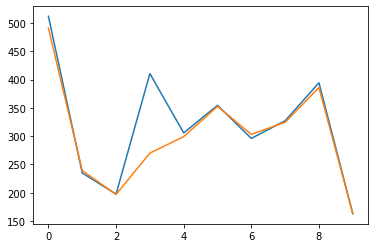

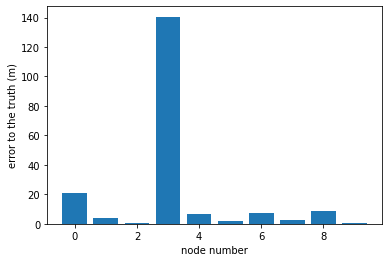

mean 19.325730529172823


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 100m
rssi = np.array([-73.94630524200359, -67.04524365136507, -65.51133843649966, -71.99102431036357, -69.38046352414914, -70.69053819851595, -69.09353142802274, -69.9814290434943, -71.63403554811134, -63.81425676768592])
d = []
for i in range(len(rssi)):
    d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
print(d)
answer = [490.9845858372635, 239.1658724664293, 197.06693373599455, 269.9714723370692, 299.17153956786615, 352.6494853812043, 303.1263591036511, 324.5792879614826, 385.8966341254787, 162.56495453832926]

plt.plot(d)
plt.plot(answer)
plt.show()
error = np.abs(np.array(d)-np.array(answer))
plt.bar([i for i in range(len(d))], error)
plt.xlabel("node number")
plt.ylabel("error to the truth (m)")
plt.show()
print('mean', np.mean(error))


[476.30527893881055, 300.7632736304257, 252.84833760516, 433.9652973897009, 346.4130332801712, 401.617964005443, 343.86944591299465, 370.874251682352, 418.67215616615033, 227.37548414457936]


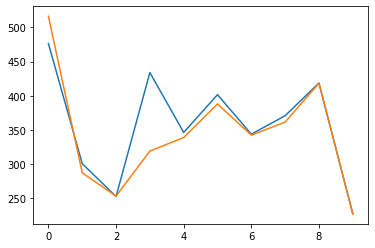

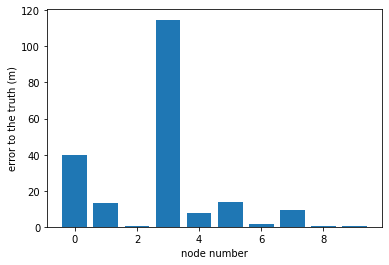

mean 20.085592991736185


In [16]:
# 200m
rssi = np.array([-73.30820763237047, -69.23509163060788, -67.69763666575939, -72.4834195311279, -70.48704007504058, -71.79711861804759, -70.42174649118574, -71.09154817944109, -72.1655655875056, -66.75685153953366])
d = []
for i in range(len(rssi)):
    d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
print(d)
answer = [516.2033160778699, 287.4027044977627, 253.44698927410218, 319.1623346760155, 338.974350190995, 388.0227564713546, 342.4698374797927, 361.5960649309987, 418.4688903961364, 227.65624182975756]

plt.plot(d)
plt.plot(answer)
plt.show()
error = np.abs(np.array(d)-np.array(answer))
plt.bar([i for i in range(len(d))], error)
plt.xlabel("node number")
plt.ylabel("error to the truth (m)")
plt.show()
print('mean', np.mean(error))

[489.3588074217971, 240.65689095825144, 192.2947928449276, 559.5039227350577, 287.7506871248685, 355.36152157821056, 297.7740251687397, 317.15525160163276, 520.4489797985229, 151.88665572438723]


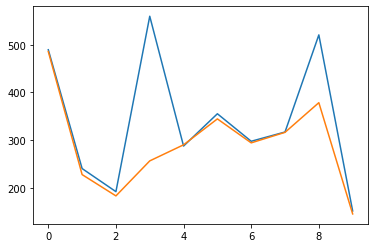

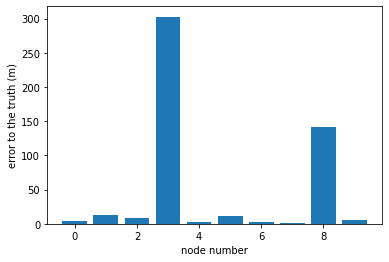

mean 49.34687913226666


In [17]:
# 50m
rssi = np.array([-73.54774707124031, -67.2598116355535, -65.27220428570674, -74.73454353002585, -68.84323573826707, -70.71299630957999, -69.14659573310989, -69.70525715798875, -74.09346777134436, -63.18224654815296])
d = []
for i in range(len(rssi)):
    d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
print(d)
answer = [485.6602346597765, 228.03577472104752, 183.39949937801595, 256.69942710462936, 290.3508396533533, 344.6181358251887, 294.42416609958434, 316.4675562732822, 378.57127760749836, 145.69613736832235]

plt.plot(d)
plt.plot(answer)
plt.show()
error = np.abs(np.array(d)-np.array(answer))
plt.bar([i for i in range(len(d))], error)
plt.xlabel("node number")
plt.ylabel("error to the truth (m)")
plt.show()
print('mean', np.mean(error))


average


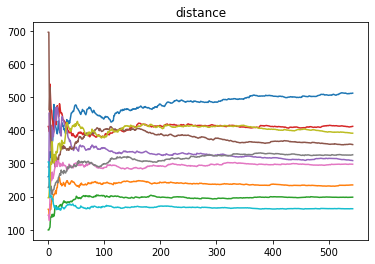

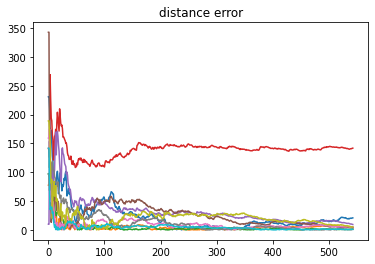

median


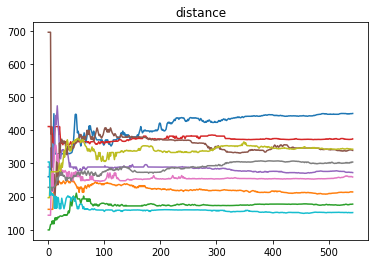

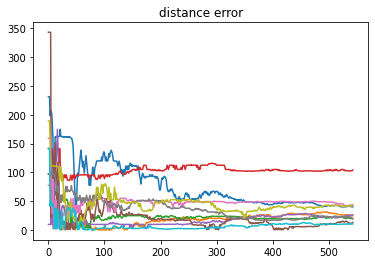

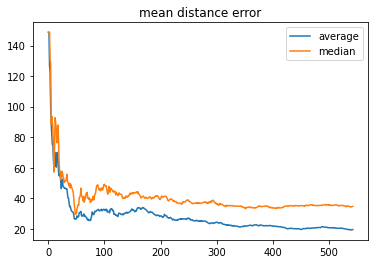

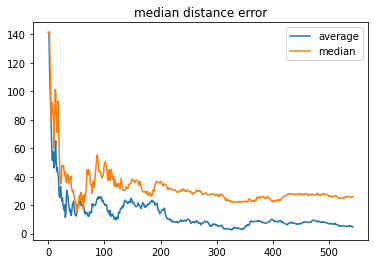

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# get rssi data
df = pd.read_csv("../results/rssi_berlin_gw100m.csv")
locations = [[822.0194698360865, 739.4046194171533, 23], [263.9939801048604, 299.80550314765424, 23], [468.6109037408023, 606.6390164084733, 23], [677.377121595724, 311.6158274188638, 5.1], [734.4841017249855, 487.4600875368342, 23], [714.6851075206068, 205.09913122281432, 19], [403.5160410553799, 136.8531596083194, 23], [220.07116886903532, 212.38414978329092, 23], [108.28748674801318, 581.6178667871282, 19], [511.31633024220355, 295.69291112665087, 23]]
distances = [490.9845858372635, 239.1658724664293, 197.06693373599455, 269.9714723370692, 299.17153956786615, 352.6494853812043, 303.1263591036511, 324.5792879614826, 385.8966341254787, 162.56495453832926]
initial_node_order = ['node0', 'node1', 'node2', 'node3', 'node4', 'node5', 'node6', 'node7', 'node8', 'node9']
conditions = pd.DataFrame(distances, index=initial_node_order)
df_count = pd.read_csv("../results/count_berlin_gw100m.csv")
node_order = []
for i in ["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]:
    node_num = df_count.loc[df_count["value"] == df[i].count()-1].index[0]
    node_order.append("node"+str(node_num))
rssi_values = df[["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]]
rssi_values.set_axis(node_order, axis='columns', inplace=True)

# calculate average
cumulative_sum = rssi_values.cumsum()
cumulative_count = rssi_values.apply(lambda x: (x.notna().cumsum()))
average_df = cumulative_sum / cumulative_count
average_df = average_df.T.reindex(index=initial_node_order).dropna(axis=1)

# calculate average
median_df = rssi_values.T.dropna(axis=1).T.expanding().median().T.reindex(index=initial_node_order)

# convert rssi to distance
def rssi2distance(x):
    return 10**((-18.67881 - x) / (10 * 2.04002))
distance_average_df = average_df.applymap(rssi2distance)
distance_median_df = median_df.applymap(rssi2distance)

# calculate error
def distance_error(x):
    return pd.DataFrame(np.abs(x - conditions.T)).T[0].tolist()
distance_average_error_df = distance_average_df.apply(distance_error)
distance_median_error_df = distance_median_df.apply(distance_error)

print("average")
# visualize
plt.figure(facecolor="white")
plt.plot(distance_average_df.T)
plt.title("distance")
plt.show()
plt.figure(facecolor="white")
plt.plot(distance_average_error_df.T)
plt.title("distance error")
plt.show()

print("median")

# visualize
plt.figure(facecolor="white")
plt.plot(distance_median_df.T)
plt.title("distance")
plt.show()

plt.figure(facecolor="white")
plt.plot(distance_median_error_df.T)
plt.title("distance error")
plt.show()

plt.figure(facecolor="white")
plt.plot(distance_average_error_df.mean().T, label="average")
plt.plot(distance_median_error_df.mean().T, label="median")
plt.title("mean distance error")
plt.legend(loc="upper right")
plt.show()

plt.figure(facecolor="white")
plt.plot(distance_average_error_df.median().T, label="average")
plt.plot(distance_median_error_df.median().T, label="median")
plt.title("median distance error")
plt.legend(loc="upper right")
plt.show()


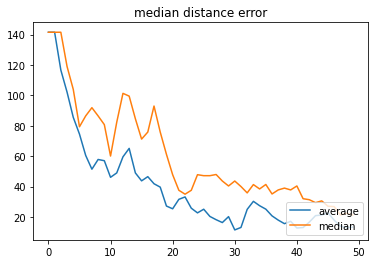

In [125]:
plt.plot(distance_average_error_df.median().T[:50], label="average")
plt.plot(distance_median_error_df.median().T[:50], label="median")
plt.title("median distance error")
plt.legend(loc="lower right")
plt.show()

In [171]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj

results = []

for i in range(20):
    d = np.array(distance_average_df[i].tolist())

    # gw100m
    altitude = 100
    answer_location = (52.53962045830213, 13.419884901364885, 100)
    source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]

    # multilateration program

    errors_array = []
    loss_array = []

    R = 6371000 # radius of the earth in meters

    # Convert GPS coordinates to Cartesian coordinates
    def to_cartesian(lat, lon, alt):
        x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
        return x, y, z

    # # Convert GPS coordinates to Cartesian coordinates
    def to_cartesian_2d(lat, lon):
        # Calculate UTM zone from longitude
        zone = int((lon + 180) / 6) + 1
        # Determine if the point is in the Northern or Southern hemisphere
        hemisphere = 'north' if lat >= 0 else 'south'

        # define the coordinate systems
        transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

        x, y = transformer.transform(lat, lon)
        return x, y

    # Convert Cartesian coordinates to GPS coordinates
    def to_gps(x, y, z):
        lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
        return lat, lon, alt

    # Calculate the distance between the receiver and each source
    def distance(xyz_receiver, xyz_source):
        return np.linalg.norm(xyz_source - xyz_receiver)

    # Objective function to minimize the sum of squared errors between estimated and actual distances
    delta = 1  # Huber parameter, can be tuned

    def huber_loss(errors):
        return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

    def error(xyz_receiver, xyz_sources, d):
        distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
        errors = distances - d
        large_errors = np.abs(errors) >= delta
        print('Number of large errors:', np.sum(large_errors))
        loss_array.append(np.sum(huber_loss(errors)))
        errors_array.append(np.sqrt(errors**2))
        return np.sum(huber_loss(errors))

    # Constraint function to ensure the estimated location has the same altitude as the wanted location
    def altitude_constraint(xyz_receiver_estimated, altitude):
        lat, lon, alt = to_gps(*xyz_receiver_estimated)
        x, y, z = to_cartesian(lat, lon, altitude)
        return xyz_receiver_estimated[2] - z

    # Define a function to convert radians to degrees
    def degrees(rad):
        return rad * 180 / np.pi

    # Starting GPS coordinates of the receiver (can be anywhere)
    receiver_location = (40.048174, 10.134445, 0)

    # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
    xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
    xyz_receiver = np.array(to_cartesian(*receiver_location))

    # Perform multilateration to estimate the location of the receiver
    result = minimize(error, xyz_receiver, args=(xyz_sources, d), constraints=[{'type': 'eq', 'fun': altitude_constraint, 'args': (altitude,)}])
    xyz_receiver_estimated = result.x

    # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
    receiver_location_estimated = to_gps(*xyz_receiver_estimated)

    print('Receiver location:', receiver_location_estimated)
    print('error to the truth in 3d', np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
    print('error to the truth in 2d', np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))
    results.append(np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))

Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
N

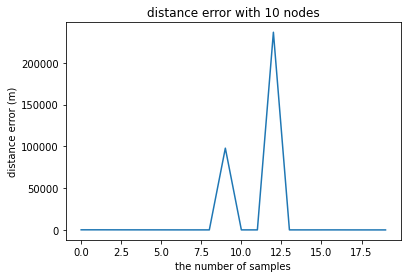

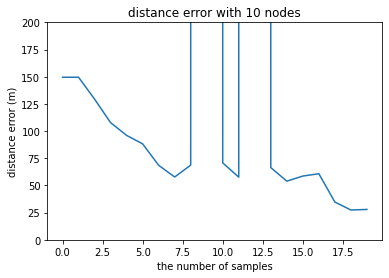

In [178]:
plt.figure(facecolor="white")
plt.title("distance error with 10 nodes")
plt.xlabel("the number of samples")
plt.ylabel("distance error (m)")
plt.plot(results)
plt.show()
plt.figure(facecolor="white")
plt.title("distance error with 10 nodes")
plt.xlabel("the number of samples")
plt.ylabel("distance error (m)")
plt.plot(results)
plt.ylim(0,200)
plt.show()

In [169]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj
import itertools
from tqdm import tqdm
results_mean = []
results_median = []

for i in range(20):
    print("node", i)
    d = np.array(distance_average_df[i].tolist())

    # gw100m
    altitude = 100
    answer_location = (52.53962045830213, 13.419884901364885, 100)
    source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]

    source_locations_iter = []
    d_iter = []
    for n in range(9,len(source_locations)):
        for source_location in itertools.combinations(source_locations, n):
            source_locations_iter.append(list(source_location))
            
    for n in range(9,len(d)):
        for d_i in itertools.combinations(d, n):
            d_iter.append(list(d_i))
    # print(source_locations_iter)
    # print(d_iter)

    # multilateration program

    errors_array = []
    loss_array = []

    R = 6371000 # radius of the earth in meters

    # Convert GPS coordinates to Cartesian coordinates
    def to_cartesian(lat, lon, alt):
        x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
        return x, y, z

    # # Convert GPS coordinates to Cartesian coordinates
    def to_cartesian_2d(lat, lon):
        # Calculate UTM zone from longitude
        zone = int((lon + 180) / 6) + 1
        # Determine if the point is in the Northern or Southern hemisphere
        hemisphere = 'north' if lat >= 0 else 'south'

        # define the coordinate systems
        transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

        x, y = transformer.transform(lat, lon)
        return x, y

    # Convert Cartesian coordinates to GPS coordinates
    def to_gps(x, y, z):
        lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
        return lat, lon, alt

    # Calculate the distance between the receiver and each source
    def distance(xyz_receiver, xyz_source):
        return np.linalg.norm(xyz_source - xyz_receiver)

    # Objective function to minimize the sum of squared errors between estimated and actual distances
    delta = 1  # Huber parameter, can be tuned

    def huber_loss(errors):
        return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

    def error(xyz_receiver, xyz_sources, d):
        distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
        errors = distances - d
        large_errors = np.abs(errors) >= delta
        # print('Number of large errors:', np.sum(large_errors))
        loss_array.append(np.sum(huber_loss(errors)))
        errors_array.append(np.sqrt(errors**2))
        return np.sum(huber_loss(errors))

    # Constraint function to ensure the estimated location has the same altitude as the wanted location
    def altitude_constraint(xyz_receiver_estimated, altitude):
        lat, lon, alt = to_gps(*xyz_receiver_estimated)
        x, y, z = to_cartesian(lat, lon, altitude)
        return xyz_receiver_estimated[2] - z

    # Define a function to convert radians to degrees
    def degrees(rad):
        return rad * 180 / np.pi
    
    receiver_location_estimated_list = []

    for j in tqdm(range(len(d_iter))):

        d_9nodes = d_iter[j]
        source_locations = source_locations_iter[j]
        # print(d_9nodes)
        # print(source_locations)

        # Starting GPS coordinates of the receiver (can be anywhere)
        receiver_location = (52.53846109447526, 13.42080118586715, 100)

        # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
        xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
        xyz_receiver = np.array(to_cartesian(*receiver_location))

        # Perform multilateration to estimate the location of the receiver
        result = minimize(error, xyz_receiver, args=(xyz_sources, d_9nodes), constraints=[{'type': 'eq', 'fun': altitude_constraint, 'args': (altitude,)}])
        xyz_receiver_estimated = result.x

        # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
        receiver_location_estimated = to_gps(*xyz_receiver_estimated)
        receiver_location_estimated_list.append(receiver_location_estimated)

        # print('Receiver location:', receiver_location_estimated)
        # print('error to the truth in 3d', np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
        # print('error to the truth in 2d', np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))
    
    mean_estimation_gps = np.mean(receiver_location_estimated_list, axis=0)
    mean_estimation_gps_error = np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*mean_estimation_gps[:2])))
    results_mean.append(mean_estimation_gps_error)

    median_estimation_gps = np.median(receiver_location_estimated_list, axis=0)
    median_estimation_gps_error = np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*median_estimation_gps[:2])))
    results_median.append(median_estimation_gps_error)


node 0


100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


node 1


100%|██████████| 10/10 [00:16<00:00,  1.66s/it]


node 2


100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


node 3


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


node 4


100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


node 5


100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


node 6


100%|██████████| 10/10 [00:17<00:00,  1.75s/it]


node 7


100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


node 8


100%|██████████| 10/10 [00:25<00:00,  2.52s/it]


node 9


100%|██████████| 10/10 [00:18<00:00,  1.88s/it]


node 10


100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


node 11


100%|██████████| 10/10 [00:15<00:00,  1.60s/it]


node 12


100%|██████████| 10/10 [00:15<00:00,  1.52s/it]


node 13


100%|██████████| 10/10 [00:15<00:00,  1.52s/it]


node 14


100%|██████████| 10/10 [00:15<00:00,  1.55s/it]


node 15


100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


node 16


100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


node 17


100%|██████████| 10/10 [00:21<00:00,  2.20s/it]


node 18


100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


node 19


100%|██████████| 10/10 [00:16<00:00,  1.70s/it]


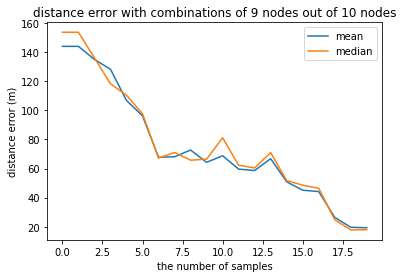

In [176]:
plt.figure(facecolor="white")
plt.plot(results_mean, label="mean")
plt.plot(results_median, label="median")
plt.legend()
plt.title("distance error with combinations of 9 nodes out of 10 nodes")
plt.xlabel("the number of samples")
plt.ylabel("distance error (m)")
plt.show()